# Machine Learning-Based Maternal Health Risk 

## Introduction
Maternal health refers to the health of women during pregnancy, childbirth, and the postpartum period. It encompasses the physical, emotional, and social well-being of mothers before, during, and after delivery.
Maternal health remains a critical component of global public health, particularly in low- and middle-income countries where access to timely and quality care is often limited. Complications during pregnancy and childbirth continue to contribute significantly to morbidity and mortality among women of reproductive age. Early identification of health risks in pregnant women can greatly enhance clinical decision-making, enabling proactive care and improving maternal and neonatal outcomes.

Advancements in data analytics and machine learning have opened new frontiers in healthcare, allowing practitioners to harness existing health data to predict potential risks. By analyzing key physiological parameters, it becomes possible to flag individuals who may be at elevated risk, even before symptoms become critical.

This project leverages basic health indicators—such as age, blood pressure, blood sugar level, body temperature, and heart rate—to classify maternal health risk levels using a simple machine learning classification approach.

## Problem Statement
Despite the availability of basic clinical data, many health systems lack the tools to convert these indicators into actionable insights for timely risk assessment. In most resource-constrained settings, there is a need for lightweight, interpretable models that can assist healthcare providers in classifying maternal risk levels during routine checkups. Without early identification, high-risk cases may go unnoticed, potentially resulting in adverse health outcomes for both the mother and the child.

## Objectives
The main objective of this project is to build a simple, interpretable classification model to **predict maternal health risk levels** based on key physiological indicators. Specifically, the project aims to:

- Explore and understand the distribution and relationships of clinical features such as Age, SystolicBP, DiastolicBP, BS, BodyTemp, and HeartRate.

- Classify maternal health risk into defined categories (e.g., low, mid, high) using supervised machine learning techniques.

- Evaluate the performance of the classification model using appropriate metrics to ensure reliability and accuracy.

- Provide insights into which features most significantly influence maternal health risk, supporting evidence-based clinical prioritization.


## Dataset Understanding

### Data Source
Data has been collected from different hospitals, community clinics, maternal health cares from the rural areas of Bangladesh through the IoT based risk monitoring system.


### Data Description


| Feature        | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| Age            | Age of the patient in years.                                                 |
| SystolicBP     | Systolic blood pressure, the pressure in arteries when the heart beats.     |
| DiastolicBP    | Diastolic blood pressure, the pressure in arteries when the heart is at rest.|
| BS             | Blood sugar level, typically measured in mmol/L.                            |
| BodyTemp       | Body temperature of the patient, usually in degrees Celsius (°C).           |
| HeartRate      | Heart rate or pulse, measured in beats per minute (bpm).                    |



### Feature Ranges and Interpretations

| Feature        | Low Range                 | Normal Range                      | High Range                          | Notes                                                                 |
|----------------|---------------------------|-----------------------------------|-------------------------------------|-----------------------------------------------------------------------|
| **Age**        | < 20 years                | 20 – 35 years                     | > 35 years                          | Pregnancy risk increases for teens and women over 35.                |
| **SystolicBP** | < 90 mmHg                 | 90 – 120 mmHg                     | > 120 mmHg                          | >140 mmHg may indicate hypertension.                                 |
| **DiastolicBP**| < 60 mmHg                 | 60 – 80 mmHg                      | > 80 mmHg                           | >90 mmHg may indicate high blood pressure.                           |
| **BS**         | < 3.9 mmol/L              | 3.9 – 6.1 mmol/L                  | > 6.1 mmol/L                        | >7.8 mmol/L is typically considered hyperglycemia.                   |
| **BodyTemp**   | < 36°C                    | 36 – 37.5°C                       | > 37.5°C                            | >38°C may indicate fever/infection.                                  |
| **HeartRate**  | < 60 bpm                  | 60 – 100 bpm                      | > 100 bpm                           | Elevated HR may suggest stress, fever, or complications.             |


### Formulating Hypothesis

- H₀ (Null Hypothesis): There is no significant relationship between systolic or diastolic blood pressure levels and the maternal health risk level.

- H₁ (Alternative Hypothesis): Higher blood sugar levels are positively associated with higher maternal health risk levels.

------------------------------------------------------------------------------------------------------------------------------------------------

## Data Inspection

In [1]:
## Importng necessary Libraries to read the data

import numpy as np
import pandas as pd

In [2]:
## Reading the dataset

maternal = pd.read_csv("Maternal Health Risk Data Set.csv")
maternal.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [3]:
## Checking for the data type and the non Null values
maternal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [4]:
#number of rows and cols
maternal.shape

(1014, 7)

------------------------------------------------------------------------------------------------------------------------------------------------

## Data Vizualization
### Pre Vizualization Summary.

Given that the target variable (RiskLevel) is categorical, it will be converted into a numerical format to facilitate correlation analysis. This will enable the identification of features that exhibit strong associations with the target, providing valuable insights for further data exploration and model development.

In [5]:
#count of the target variable.
maternal['RiskLevel'].value_counts()

RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64

In [6]:
#converting the categorical col(taget variable) to numerical

#step 1:creating a dataframe
df = pd.DataFrame(maternal)

#step 2:converting the categorical col to numerical
df['RiskLevel_numeric'] = df['RiskLevel'].map({'high risk': 1, 'mid risk': 2,'low risk': 0})

#preview the dataset
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,RiskLevel_numeric
0,25,130,80,15.0,98.0,86,high risk,1
1,35,140,90,13.0,98.0,70,high risk,1
2,29,90,70,8.0,100.0,80,high risk,1
3,30,140,85,7.0,98.0,70,high risk,1
4,35,120,60,6.1,98.0,76,low risk,0


In [7]:

#dropping the categorical col after mapping
df.drop(['RiskLevel'], axis=1, inplace=True)

df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_numeric
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [8]:
# Show correlation of all features with the target variable
correlation_with_target = df.corr(numeric_only=True)['RiskLevel_numeric'].sort_values(ascending=False)

# Drop self-correlation (1.0) if you want
correlation_with_target = correlation_with_target.drop('RiskLevel_numeric')

print(correlation_with_target)


SystolicBP     0.186238
BodyTemp       0.149152
BS             0.104971
HeartRate      0.082852
DiastolicBP    0.070440
Age            0.061150
Name: RiskLevel_numeric, dtype: float64


By leveraging correlation analysis, I have identified the features that exhibit a strong relationship with the target variable. This has streamlined the process of selecting relevant variables for visualization, enabling more focused and insightful data exploration.

## Univariate Analysis

C:\Users\AHB\AppData\Local\Temp\ipykernel_10388\4118413137.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=maternal, x='RiskLevel', palette='Set2', legend=False)


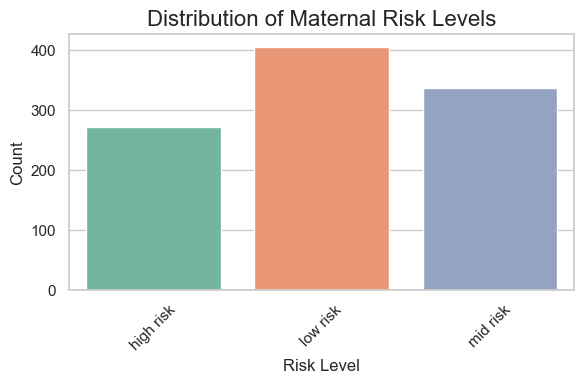

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot value counts of RiskLevel
plt.figure(figsize=(6, 4))
sns.countplot(data=maternal, x='RiskLevel', palette='Set2', legend=False)

# Add labels and title
plt.title('Distribution of Maternal Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_numerical_distribution(df, column):
    """
    Plots the distribution (histogram + KDE) of a numerical column from the given DataFrame.
    
    Parameters:
        df (DataFrame): The dataset.
        column (str): The name of the numerical column to plot.
    """
    if column not in df.columns:
        print(f"Column '{column}' not found in DataFrame.")
        return
    
    if not pd.api.types.is_numeric_dtype(df[column]):
        print(f"Column '{column}' is not numerical.")
        return
    
    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, bins=30, kde=True, color='skyblue')

    plt.title(f'Distribution of {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()


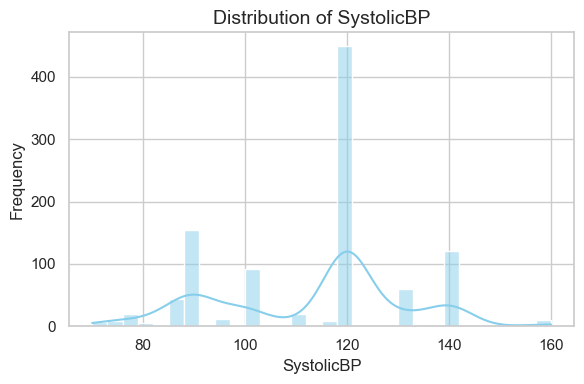

In [11]:
plot_numerical_distribution(maternal, 'SystolicBP')

In [12]:
maternal.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

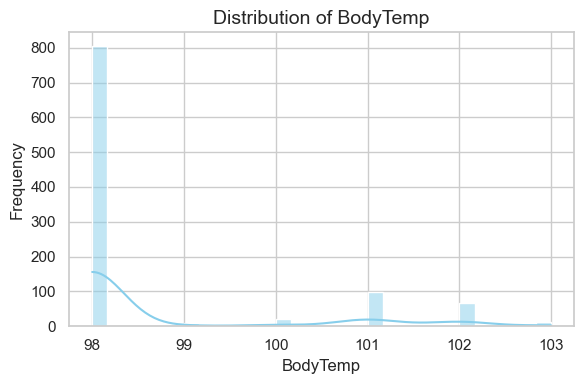

In [13]:
plot_numerical_distribution(maternal, 'BodyTemp')

## Bivariate Analysis

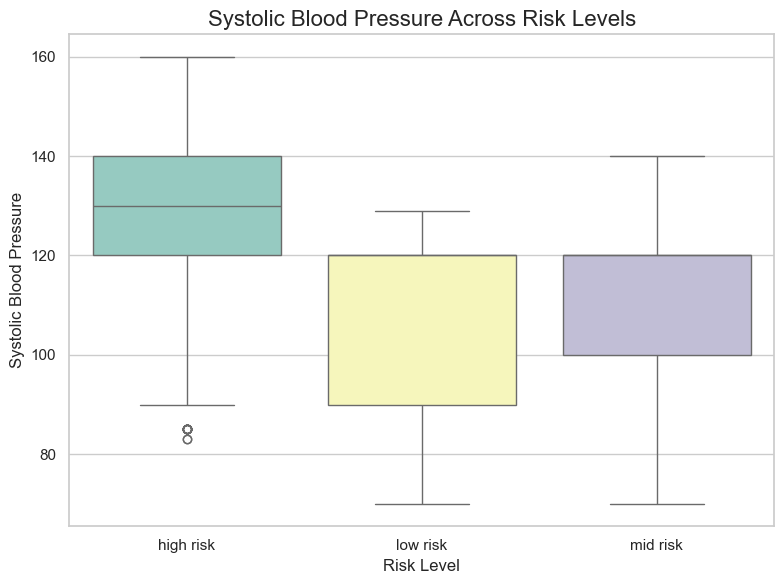

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
# sns.boxplot(data=maternal, x='RiskLevel', y='SystolicBP', palette='Set2')
sns.boxplot(data=maternal, x='RiskLevel', y='SystolicBP', hue='RiskLevel', palette='Set3', legend=False)


# Add labels and title
plt.title('Systolic Blood Pressure Across Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Systolic Blood Pressure', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()


- Systolic BP increases with risk level, which is expected since high BP is a risk factor in maternal health.

- Greater variation in high-risk patients may suggest underlying complications or inconsistencies in management

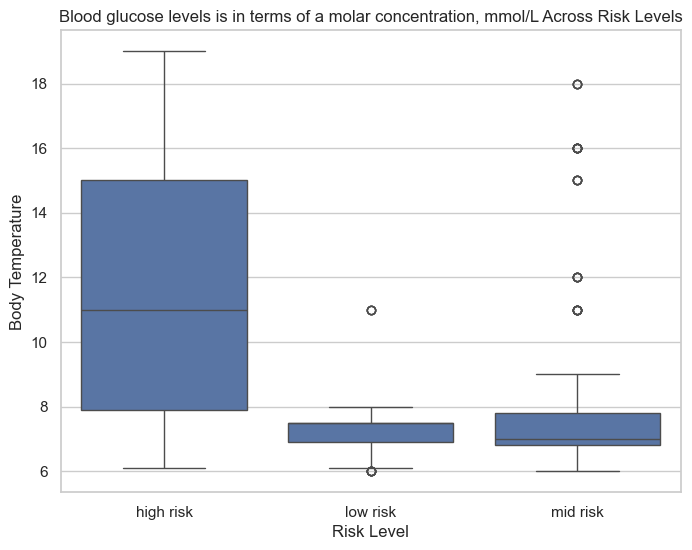

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='RiskLevel', y='BS', data=maternal)
plt.title('Blood glucose levels is in terms of a molar concentration, mmol/L Across Risk Levels')
plt.xlabel('Risk Level')
plt.ylabel('Body Temperature')
plt.show()


In [16]:
import pandas as pd
import scipy.stats as stats

# Drop rows with missing values in the columns you're analyzing
df_clean = maternal[['RiskLevel','BS']].dropna()

# Check group sizes
print(df_clean['RiskLevel'].value_counts())

# Group the data
groups = [group['BS'].values for name, group in df_clean.groupby('RiskLevel')]

# Run one-way ANOVA
f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)


RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64
F-statistic: 331.1580718102703
p-value: 2.4156256970362624e-111


The very high F-statistic (331.16) means the variation between groups (risk levels) is much greater than the variation within groups.

The tiny p-value indicates that the differences in blood glucose levels across risk categories are extremely statistically significant.

Blood glucose level is strongly associated with maternal risk level.
The differences are not due to chance, so this feature is likely a powerful predictor for identifying high-risk maternal health cases.

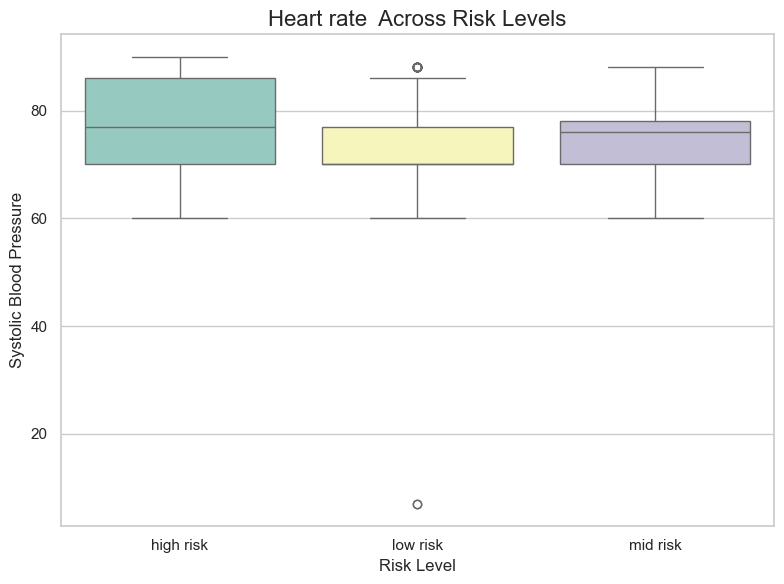

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 6))
# sns.boxplot(data=maternal, x='RiskLevel', y='HeartRate', palette='Set3')

sns.boxplot(data=maternal, x='RiskLevel', y='HeartRate', hue='RiskLevel', palette='Set3', legend=False)


# Add labels and title
plt.title('Heart rate  Across Risk Levels', fontsize=16)
plt.xlabel('Risk Level', fontsize=12)
plt.ylabel('Systolic Blood Pressure', fontsize=12)
plt.tight_layout()

# Show plot
plt.show()

# Modeling

In [ ]:
#final dataset for modeling
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel_numeric
0,25,130,80,15.0,98.0,86,1
1,35,140,90,13.0,98.0,70,1
2,29,90,70,8.0,100.0,80,1
3,30,140,85,7.0,98.0,70,1
4,35,120,60,6.1,98.0,76,0


In [19]:
#importing necessary libraries for modeling

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [26]:
# # Load your dataset
# df = pd.read_csv("your_dataset.csv")  # Replace with your actual dataset file

# Split features and target
X = df.drop("RiskLevel_numeric", axis=1)
y = df["RiskLevel_numeric"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Results of the test data")
print(X_test.shape)

print(y_test.shape)
print(f"Results of the train data")
print(X_train.shape)

print(y_train.shape)


Results of the test data
(203, 6)
(203,)
Results of the train data
(811, 6)
(811,)


## 1. Logistic Regression

c:\Users\AHB\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=== Logistic Regression ===
Accuracy: 0.625615763546798
[[71  1  8]
 [11 34  2]
 [47  7 22]]
              precision    recall  f1-score   support

           0       0.55      0.89      0.68        80
           1       0.81      0.72      0.76        47
           2       0.69      0.29      0.41        76

    accuracy                           0.63       203
   macro avg       0.68      0.63      0.62       203
weighted avg       0.66      0.63      0.60       203



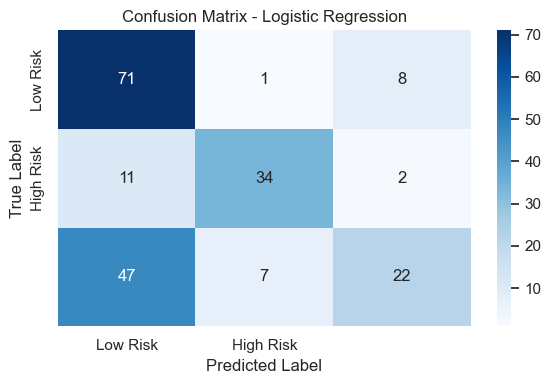

In [32]:
# Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test)

# Evaluation
print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

# Plot confusion matrix using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



## 2. Decison Tree Algorithm

=== Decision Tree ===
Accuracy: 0.8177339901477833
[[62  5 13]
 [ 1 40  6]
 [ 9  3 64]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        80
           1       0.83      0.85      0.84        47
           2       0.77      0.84      0.81        76

    accuracy                           0.82       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203



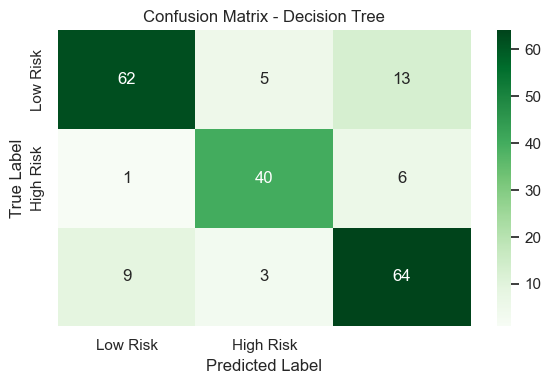

In [ ]:
# Decision Tree Model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predictions
y_pred_tree = dtree.predict(X_test)

# Evaluation
print("=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Compute confusion matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Greens', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


## 3. Random Forest Classifier


=== Random Forest ===
Accuracy: 0.812807881773399
[[61  3 16]
 [ 1 40  6]
 [ 9  3 64]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.81        80
           1       0.87      0.85      0.86        47
           2       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203



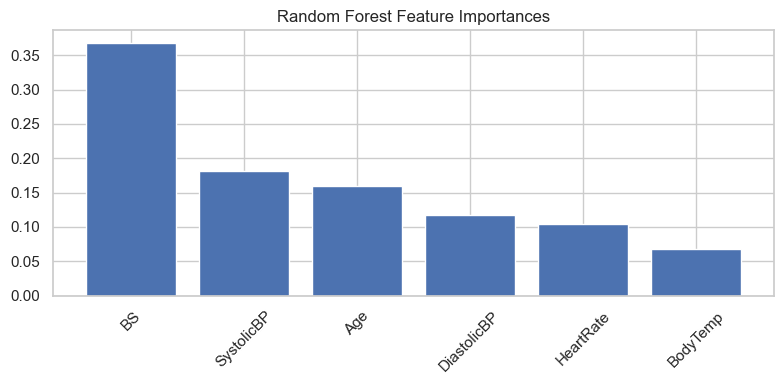

Random forest confusion matrix


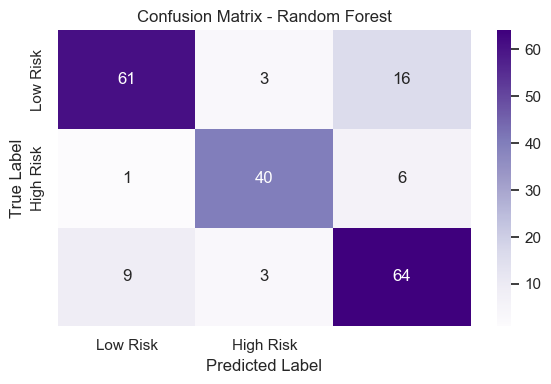

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# === Random Forest ===
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# === Random Forest Feature Importance Plot ===
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8,4))
plt.title("Random Forest Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=45)
plt.tight_layout()
plt.show()


print(f"Random forest confusion matrix")
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot using seaborn
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples', xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()



I selected Random Forest as my final model for predicting maternal health risk because it outperformed both Logistic Regression and Decision Tree models in terms of accuracy. While Logistic Regression achieved 61% and Decision Tree reached 81.2%, Random Forest gave the highest accuracy at 81.7%.

Random Forest is a robust ensemble learning method that combines multiple decision trees to improve prediction performance and reduce overfitting. It handles both linear and non-linear relationships well, can model feature interactions, and is less sensitive to noise. Its ability to provide feature importance also adds transparency to the model, making it a strong choice for healthcare-related risk predictions.

### Hyperparameter Tuning (Random Forest)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Set up the GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit on training data
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy from CV:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy from CV: 0.8286525789593273


# **MODEL DEPLOYMENT GUIDE** 

## **1. Save the Model and Preprocessing Pipeline**  
Train the **best model** and save it along with the preprocessing pipeline (e.g., encoding, scaling) using **pickle** to enable easy loading for predictions.

## **2. Install Dependencies**  
Install **Flask** as the web framework to:  
- Serve the model  
- Handle form submissions  
- Render dynamic HTML templates  

## **3. Organize Project Structure**  
Follow a **clear directory structure** for better maintainability:  
```
Deployment/
├── app.py                                                                      # Flask app (backend)
├── diabetes_model.pkl         # Pickle encoder, model and/or pipeline                      (backend)
├── templates/                                                                              # (front end)
│   └── homepage.html          # Main HTML page with input form and results
├── static/                                                                                 # (front end)
│   ├── css/
│   │   └── styles.css         # Styles for the web app
│   └── images/
│       ├── background.jpg     # Background image
│       └── diabetes_chart.png # Visualizations (if needed)

```


## **4. Develop the Flask App (`app.py`)**  
Create a **Flask application** with the following key routes:  

- **Home (`/`)** → Renders `homepage.html` where users input data  
- **Predict (`/predict`)** → Processes input data, makes a prediction, and returns results  

## **5. Build the HTML Interface**  
Design `homepage.html` to:  
- Provide a simple **form for user input**  
- Display the **predicted result** dynamically  

## **6. Apply Styling (CSS)**  
Enhance user experience with **`static/css/styles.css`**:  
- Set a **background image (`background.jpg`)**  
- Ensure a **clean and user-friendly layout**  
- Style **buttons and input fields** for better UX  

## **7. Load and Use the Pickled Model**  
- Load `diabetes_model.pkl` inside `app.py`  
- Ensure the **same preprocessing pipeline** (e.g., encoding, scaling) is applied to user input before making predictions  

## **8. Handle Predictions**  
- Extract user input from the form  
- Convert input into a **DataFrame** for model compatibility  
- Pass the data through the **trained pipeline** for transformation  
- Predict the diabetes readmission status and return the result  

## **9. Run and Deploy the Flask App**  
- Test the app **locally** (`python app.py`)  
- Deploy it on a cloud service like **Render, Heroku, or AWS** for public access  

---

## **Project Workflow Summary**  

1. **Train & Save Model** → Serialize the best model and preprocessing pipeline  
2. **Set Up Flask App** → Load model, create routes, handle user input  
3. **Develop Frontend** → HTML form for data entry & results  
4. **Make Predictions** → Process input, run the model, display output  
5. **Deploy** → Host the app online for real-world usage  

---

## **File Descriptions**  

### **Backend**  
- **`app.py`**  
  - Main Flask application handling routing, form submissions, and predictions  
- **`diabetes_model.pkl`**  
  - Pickled machine learning model with preprocessing steps for consistent predictions  

### **Frontend**  
- **`templates/homepage.html`**  
  - User interface for input collection and displaying prediction results  
- **`static/css/styles.css`**  
  - CSS file for styling the web application  
- **`static/images/`**  
  - Stores UI assets like:  
  - **`background.jpg`** → Background image for aesthetics  
  - **`diabetes_chart.png`** → Optional visualization (e.g., model performance or trends)  

Follow these steps to successfully deploy your  Prediction Model. 


# THINGS TO NOTE WHILE PICKLING AND HANDLING DATA 

## **1. Pickling the Model and Preprocessing Pipeline**  
Pickling is the process of **serializing and saving Python objects** (such as models, encoders, and pipelines) into a file. This ensures that the trained model and its preprocessing steps can be **reloaded** later without retraining.  

### **Steps for Pickling:**  
1. Train the best model and finalize preprocessing steps (e.g., encoding, scaling).  
2. Save the trained model, encoder, and preprocessing pipeline using the `pickle` library.  
3. Store the pickled file (`diabetes_model.pkl`) in the deployment folder for easy access.  
4. Load the pickled model during deployment to ensure consistency in preprocessing and predictions.  

---

## **2. Reading User Data in Deployment**  

When a user submits input via the web interface:  
1. The **Flask app** retrieves the form data from `homepage.html`.  
2. The input values are extracted using Flask’s `request.form` method.  
3. The data is converted into a structured format (e.g., a Pandas DataFrame) to match the expected model input.  

---

## **3. Preprocessing and Encoding User Data**  

To ensure the model can correctly interpret user data:  
1. The input data must undergo the **same preprocessing** steps used during training.  
2. The saved **encoder and scaler** are loaded and applied to transform the data.  
3. Categorical features (e.g., `race`, `gender`, `admission_type_id`) are **encoded** using the trained encoder.  
4. Numerical features (e.g., `age`, `num_lab_procedures`, `num_medications`) are **scaled** if required.  
5. The transformed data is prepared in the correct format for model inference.  

---

## **4. Making Predictions**  

1. The **preprocessed user input** is passed to the trained model.  
2. The model outputs a **prediction** (e.g., readmission status).  
3. The result is **converted into a human-readable format** (e.g., "Not Readmitted" or "Readmitted").  

---

## **5. Displaying the Prediction to the User**  

1. The prediction result is sent back to `homepage.html`.  
2. The web page dynamically updates to display the **readmission prediction** to the user.  
3. If needed, additional visualizations (e.g., diabetes trends) can be presented.  

---

## **6. Ensuring Consistency in Encoding & Processing**  

1. The preprocessing pipeline used in training (e.g., **OneHotEncoder**, **StandardScaler**) must be applied **exactly the same way** during inference.  
2. To achieve this, the **entire pipeline (encoder + model) is pickled together** and reloaded during deployment.  
3. This guarantees that user input is handled **identically to training data**, avoiding mismatches.  

---

## **7. Running the Flask App for Deployment**  

1. The Flask app is started locally or hosted on a cloud platform like **Heroku, Render, or AWS**.  
2. The user accesses the web app, inputs data, and submits the form.  
3. The Flask app processes the request, makes a prediction, and returns the result.  
4. The deployed model is now accessible to multiple users for real-time diabetes readmission predictions. 🚀  
